<a href="https://colab.research.google.com/github/ramshamashood/CODSOFT/blob/main/CodsoftTask2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving Titanic Dataset.csv to Titanic Dataset.csv
User uploaded file "Titanic Dataset.csv" with length 29474 bytes


In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('/content/Titanic Dataset.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
missing_values = df.isnull().sum()
print(missing_values)


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


// Filling Missing Values and removing Cabin Column as it include lots of missing Data

In [ ]:

df['Age'].replace(np.nan, df['Age'].mean(), inplace=True)
df['Fare'].replace(np.nan, df['Fare'].mean(), inplace=True)
df.drop('Cabin', axis=1,inplace=True)
df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [ ]:
df.nunique()


PassengerId    418
Survived         2
Pclass           3
Name           418
Sex              2
Age             80
SibSp            7
Parch            8
Ticket         363
Fare           170
Embarked         3
dtype: int64

In [ ]:
df.describe()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,12.634534,0.896760,0.981429,55.840500
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,23.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,30.272590,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,35.750000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


//Removing All Features which are bad and have no impact

In [ ]:
Newdf = df.drop(['PassengerId','Name', 'Ticket'], axis=1)
Newdf.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,34.5,0,0,7.8292,Q
1,1,3,female,47.0,1,0,7.0000,S
2,0,2,male,62.0,0,0,9.6875,Q
3,0,3,male,27.0,0,0,8.6625,S
4,1,3,female,22.0,1,1,12.2875,S


In [ ]:

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
Newdf["Sex"] = le.fit_transform(Newdf["Sex"])
Newdf["Embarked"] = le.fit_transform(Newdf["Embarked"])


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,34.50000,0,0,7.8292,1
1,1,3,0,47.00000,1,0,7.0000,2
2,0,2,1,62.00000,0,0,9.6875,1
3,0,3,1,27.00000,0,0,8.6625,2
4,1,3,0,22.00000,1,1,12.2875,2
...,...,...,...,...,...,...,...,...
413,0,3,1,30.27259,0,0,8.0500,2
414,1,1,0,39.00000,0,0,108.9000,0
415,0,3,1,38.50000,0,0,7.2500,2
416,0,3,1,30.27259,0,0,8.0500,2


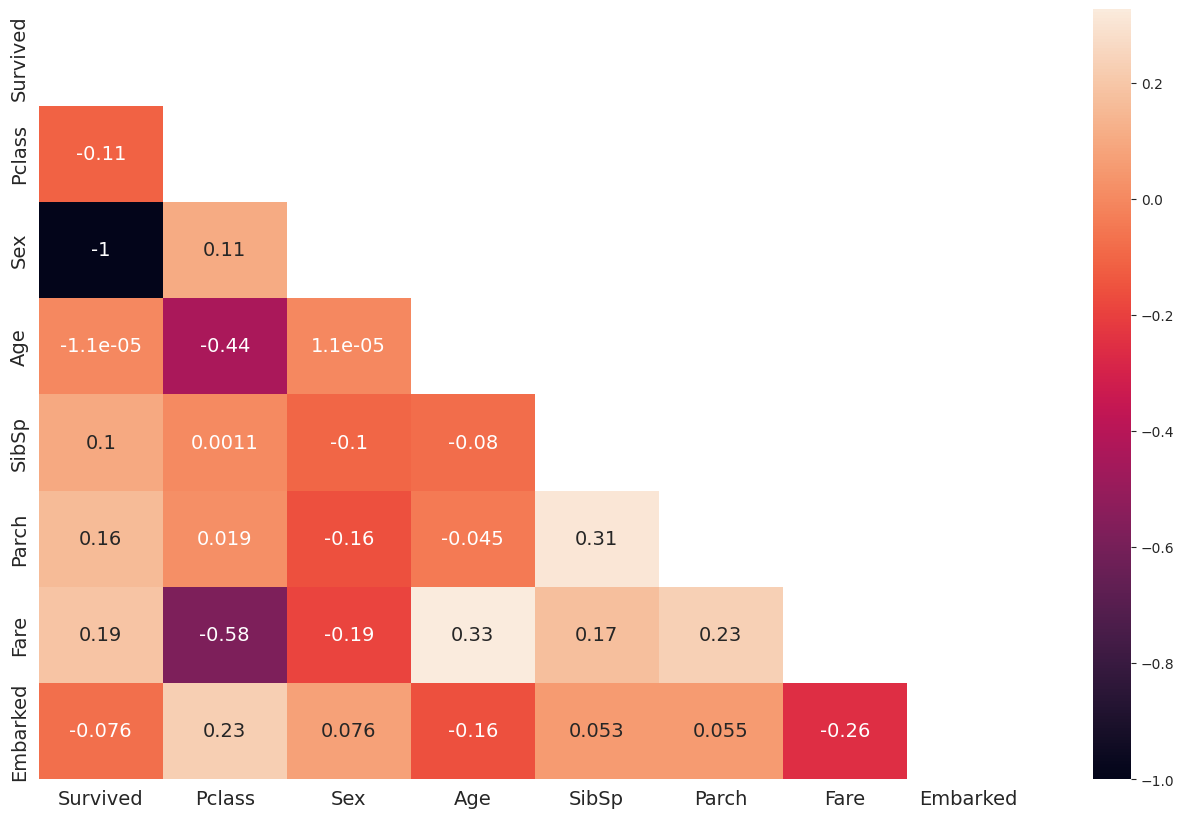

In [ ]:
mask = np.zeros_like(Newdf.corr())
triangle_indices = np.triu_indices_from(mask)
mask[triangle_indices] = True
mask
plt.figure(figsize=(16,10))
sns.heatmap(Newdf.corr(), mask=mask, annot=True, annot_kws={"size": 14})
sns.set_style('white')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay

Columns=['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']
X=Newdf[Columns]
Y=Newdf['Survived']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=1)
LR = LogisticRegression(random_state=1,solver='lbfgs', max_iter=300)
LR=LR.fit(X_train, Y_train)

y_pred_train = LR.predict(X_train)

#Finding metrics
print('Accuracy: ', accuracy_score(Y_train, y_pred_train))
print('Precision: ', precision_score(Y_train, y_pred_train))
print('Recall: ', recall_score(Y_train, y_pred_train))
print('F1 Score: ', f1_score(Y_train, y_pred_train))




Accuracy:  1.0
Precision:  1.0
Recall:  1.0
F1 Score:  1.0


Accuracy:  1.0
Precision:  1.0
Recall:  1.0
F1 Score:  1.0


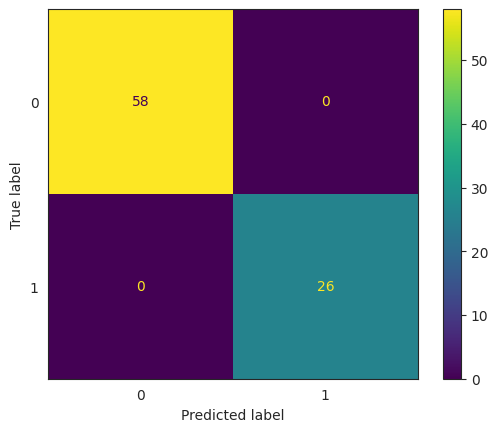

In [ ]:
# PREDICTION ON TEST DATA
LR=LR.fit(X_test, Y_test)

y_pred = LR.predict(X_test)

#Finding metrics
print('Accuracy: ', accuracy_score(Y_test, y_pred))
print('Precision: ', precision_score(Y_test, y_pred))
print('Recall: ', recall_score(Y_test, y_pred))
print('F1 Score: ', f1_score(Y_test, y_pred))


cm = confusion_matrix(Y_test, y_pred, labels=LR.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=LR.classes_)
disp.plot();